In [12]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

In [13]:
# need a function that returns true if a string contains only white space or is None

def string_is_empty(s):
    """ return true of string is None, empty, or contains only whitespace. """
    if not s:
        return True
    elif s.isspace():
        return True
    else:
        return False

In [14]:
print string_is_empty('')

True


(-6.2203534541077907, 6.2203534541077907)

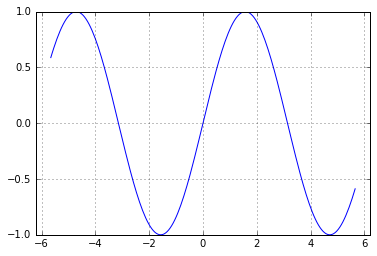

In [17]:
x = np.linspace(-1.8*np.pi, 1.8*np.pi, 200)
y = np.sin(x)
fig, ax = plt.subplots(1,1)
ax.plot(x, y)
ax.grid()
ax.set_xlim(1.1*x.min(), 1.1*x.max())

In [1]:
s = 'asrl1::instr'
s.split('::')

['asrl1', 'instr']

In [2]:
'_'.join(s.split('::'))

'asrl1_instr'

In [11]:
import requests
import json
import time
import numpy as np

In [5]:
 r = requests.get('http://localhost:5000/instruments')

In [7]:
json.loads(r.text)

{u'IDN': [u'', u'', u'LSCI,MODEL370,370014,04102008\n', u''],
 u'address': [u'ASRL1::INSTR', u'ASRL2::INSTR', u'GPIB0::5::INSTR', u'url'],
 u'errors': [u'VI_ERROR_TMO (-1073807339): Timeout expired before operation completed.',
  u'VI_ERROR_RSRC_BUSY (-1073807246): The resource is valid, but VISA cannot currently access it.',
  u'',
  u'']}

In [12]:
r = requests.get('http://localhost:5000/GPIB_5_INSTR/connect/')
tstart = time.time()
times = []
for i in range(100):
    trequest = time.time()
    r = requests.get('http://localhost:5000/GPIB_5_INSTR/id')
    times.append(time.time()-trequest)
print('{}, {}').format(np.mean(times), np.std(times))

0.00627336025238, 0.00146408602081


In [1]:
import visa

In [2]:
rm = visa.ResourceManager()

In [3]:
rm.list_resources()

(u'ASRL1::INSTR', u'ASRL2::INSTR', u'ASRL3::INSTR')

In [4]:
s = rm.open_resource('ASRL3::INSTR')